# 1. Importar Librerías

In [9]:
import joblib
import tensorflow as tf
from sklearn import metrics
import plotly.express as px

# 2. Importar modelo

In [10]:
model = tf.keras.models.load_model("salidas\\best_model.h5")

# 3. Importar imágenes

In [11]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')

In [12]:
x_train2 = x_train.reshape(6953,30000)
x_test2 = x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

# 4. Distribución de las predicciones

In [21]:
p = model.predict(x_test)
hist = px.histogram(p)
hist.update_layout(title = "Distribución de las predicciones en test", showlegend = False,
                   xaxis_title = "Predicciones", yaxis_title = "Frecuencia")
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


# 5. Análisis de los que tienen tumor

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       716
           1       0.99      0.94      0.97      1021

    accuracy                           0.96      1737
   macro avg       0.96      0.97      0.96      1737
weighted avg       0.96      0.96      0.96      1737



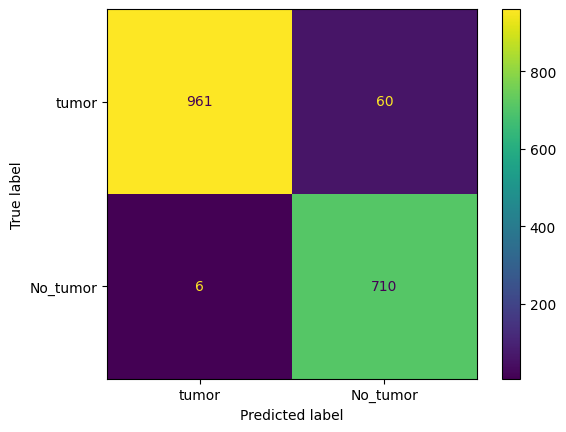

In [22]:
pred_test1 = (model.predict(x_test) >= 0.98).astype('int')
cm = metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))

# 6. Análisis de los que no tienen tumor

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       716
           1       0.98      1.00      0.99      1021

    accuracy                           0.98      1737
   macro avg       0.99      0.98      0.98      1737
weighted avg       0.98      0.98      0.98      1737



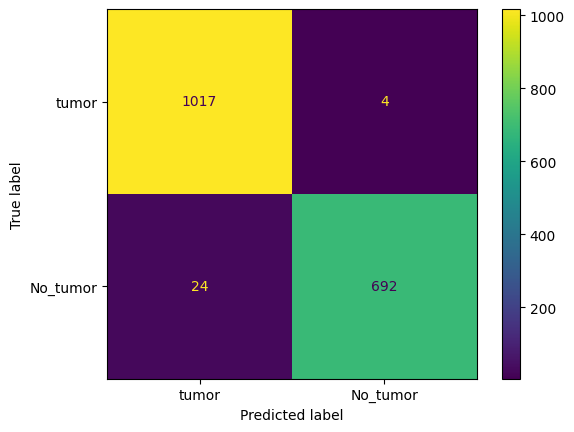

In [23]:
pred_test0 = (model.predict(x_test) > 0.02).astype('int')
cm = metrics.confusion_matrix(y_test, pred_test0, labels = [1,0])
disp = metrics.ConfusionMatrixDisplay(cm,display_labels = ['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test0))